# Two ways to define ANN

In [7]:
import tensorflow as tf
import keras

# 1- Modèle Sequentiel

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
modelWay1 = Sequential()
modelWay1.add(Dense(units=64, activation='relu', input_dim=100))
modelWay1.add(Dense(units=5, activation='softmax'))

# 2- Modèle Fonctionnel

In [10]:
from keras.models import Model
from keras.layers import Input, Dense

In [11]:
inputs = Input(shape=(100,))
x = Dense(units=64, activation='relu')(inputs)
outputs = Dense(units=5, activation='softmax')(x)
modelWay2 = Model(inputs, outputs)

# 3- Compile is the same for sequential and fonctional way

In [12]:
modelWay1.compile(optimizer="adam",loss="crossentropy",metrics=["accurracy"])
modelWay2.compile(optimizer="adam",loss="crossentropy",metrics=["accurracy"])

# 4- Fit

In [ ]:
# Here, there is no data x_train_set and y_train_set.
modelWay1.fit(x_train_set, y_train_set, epochs=20, batch_size=32, validation_split=0.2)
modelWay2.fit(x_train_set, y_train_set, epochs=20, batch_size=32, validation_split=0.2)

# 5- Evaluate

In [ ]:
# Here, there is no data x_test, y_test.
modelWay1.evaluate(x_test, y_test)
modelWay2.evaluate(x_test, y_test)

# 6- Predictions

In [ ]:
# Here, there is no data x_new.
prediction1 = modelWay1.predict(x_new)
prediction2 = modelWay2.predict(x_new)

# 7- Save model weights

In [ ]:
modelWay1.save("modelWay1.h5")
modelWay2.save("modelWay2.h5")

# 8- Load model weights

In [15]:
from keras.models import load_model

In [ ]:
modelWay1 = load_model("path to the model way 1")
modelWay2 = load_model("path to the model way 2")

# Example

In [16]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [26]:
# Charger les données
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [32]:
print(X_train[1000].shape)

(28, 28)


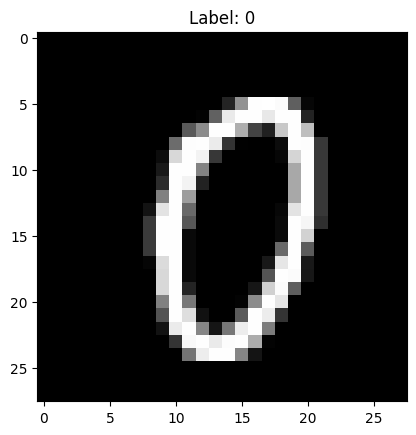

In [30]:
import matplotlib.pyplot as plt

# Afficher la première image du jeu de données d'entraînement
plt.imshow(X_train[1000], cmap='gray')
plt.title(f'Label: {Y_train[1000]}')
plt.show()

In [20]:
# Afficher les tailles de X_train, Y_train, X_test, Y_test avant prétraitement
print(" Taille de X_train : ",X_train.shape)
print(" Taille de Y_train : ",Y_train.shape)
print(" Taille de X_test : ",X_test.shape)
print(" Taille de Y_test : ",Y_test.shape)

 Taille de X_train :  (60000, 28, 28)
 Taille de Y_train :  (60000,)
 Taille de X_test :  (10000, 28, 28)
 Taille de Y_test :  (10000,)


In [21]:
# Prétraitement

X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [22]:
# Afficher les tailles de X_train, Y_train, X_test, Y_test après prétraitement
print(" Taille de X_train : ",X_train.shape)
print(" Taille de Y_train : ",Y_train.shape)
print(" Taille de X_test : ",X_test.shape)
print(" Taille de Y_test : ",Y_test.shape)

 Taille de X_train :  (60000, 784)
 Taille de Y_train :  (60000, 10)
 Taille de X_test :  (10000, 784)
 Taille de Y_test :  (10000, 10)


In [24]:
# Définir le modèle
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=784))
model.add(Dense(units=10, activation="softmax"))

# Compiler et entraîner
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs = 5, batch_size=32, validation_split = 0.2)

# Evaluer sur les données de test
score = model.evaluate(X_test, Y_test)
print(f"Accuracy : {score[1]}")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8433 - loss: 0.5609 - val_accuracy: 0.9469 - val_loss: 0.1948
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9495 - loss: 0.1781 - val_accuracy: 0.9606 - val_loss: 0.1411
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9631 - loss: 0.1242 - val_accuracy: 0.9637 - val_loss: 0.1202
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9720 - loss: 0.0957 - val_accuracy: 0.9673 - val_loss: 0.1106
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0795 - val_accuracy: 0.9696 - val_loss: 0.1004
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9652 - loss: 0.1145
Accuracy : 0.9706000089645386
